<a href="https://colab.research.google.com/github/changbai-phu/Currency_Exchange_Rate_Predict/blob/main/Different_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance requests beautifulsoup4 pandas

## 1. Data Preparation

In [1]:
#google page only has real time data, need to go to yahoo finance for historical data
import yfinance as yf

# Get last 6 months of daily data
df = yf.download("CADCNY=X", start="2025-02-01", end="2025-08-01", interval='1d')
df = df[['Close']]
df.reset_index(inplace=True)
df.columns = ['Date', 'Rate']

df.to_csv("cad_cny_history.csv", index=False)
print(df.tail())

/tmp/ipython-input-3523705728.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("CADCNY=X", start="2025-02-01", end="2025-08-01", interval='1d')
[*********************100%***********************]  1 of 1 completed

          Date      Rate
122 2025-07-25  5.243906
123 2025-07-28  5.220485
124 2025-07-29  5.226109
125 2025-07-30  5.209860
126 2025-07-31  5.190529


In [2]:
df.head()

,Date,Rate
0,2025-02-03,4.883466
1,2025-02-04,4.989753
2,2025-02-05,5.010937
3,2025-02-06,5.078317
4,2025-02-07,5.093781


### 2. Model Forecast

### A. ARIMA (AutoRegressive Integrated Moving Average)
- Good for stationary data, using differencing to calculate linear/polynomial trends
- Good for short-term forecasting
- Good for no strong seasonal patterns
- Used in finance, weather forecasting, demand prediction etc

ARIMA(p, d, q)
- p =  number of autoregressive terms
- d = number of differences to make the series stationary
- q = number of moving average terms



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Forecasted Rates for the next 14 days:
         Date  Forecasted_Rate
0  2025-08-01         5.176195
1  2025-08-02         5.168717
2  2025-08-03         5.166518
3  2025-08-04         5.159825
4  2025-08-05         5.153336
5  2025-08-06         5.147088
6  2025-08-07         5.144147
7  2025-08-08         5.141845
8  2025-08-09         5.139380
9  2025-08-10         5.136612
10 2025-08-11         5.134290
11 2025-08-12         5.132813
12 2025-08-13         5.131659
13 2025-08-14         5.130576


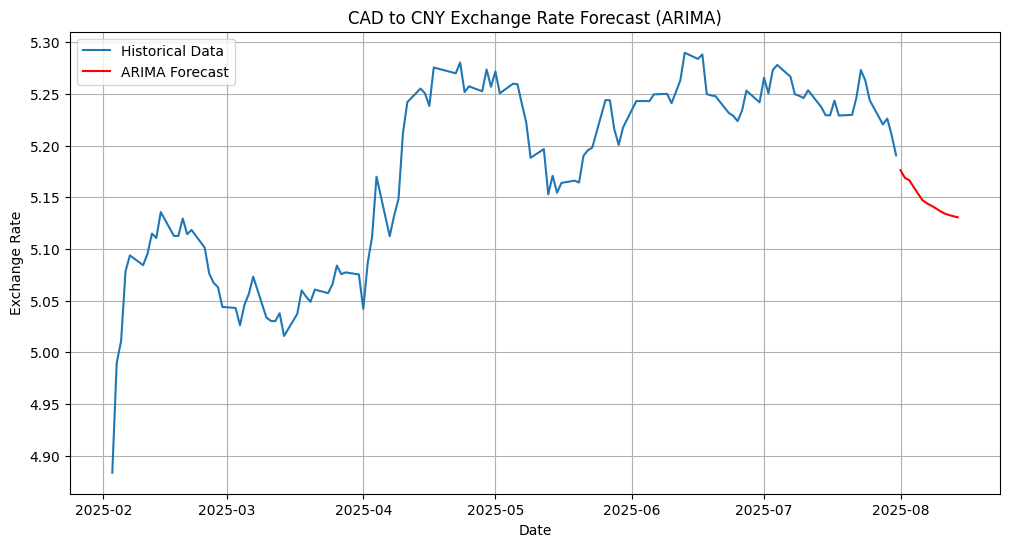

In [3]:
# Import necessary libraries for ARIMA
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
# df = pd.read_csv("cad_cny_history.csv")

# Prepare data for ARIMA - ARIMA requires a time series with a DatetimeIndex
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Fit the ARIMA model
model = ARIMA(df['Rate'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions for the next 14 days
forecast_steps = 14
forecast = model_fit.forecast(steps=forecast_steps)

# Create a date range for the forecast
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Rate': forecast.values})

# Display the forecasted rates
print("Forecasted Rates for the next 14 days:")
print(forecast_df)

# Optional: Plot the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Rate'], label='Historical Data')
plt.plot(forecast_df['Date'], forecast_df['Forecasted_Rate'], color='red', label='ARIMA Forecast')
plt.title('CAD to CNY Exchange Rate Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
start_rate = forecast_df['Forecasted_Rate'].iloc[0]
end_rate = forecast_df['Forecasted_Rate'].iloc[-1]
rate_change = end_rate - start_rate
trend = "increase" if rate_change > 0 else "decrease" if rate_change < 0 else "remain stable"

start_day = forecast_df['Date'].iloc[0]
end_day = forecast_df['Date'].iloc[-1]

summary = (
    f"The CAD to CNY exchange rate is forecasted to {trend} by "
    f"{abs(rate_change)/start_rate*100:.2f}% over the next 14 days, "
    f"from {start_rate:.4f} to {end_rate:.4f} for date: {start_day} to {end_day}."
)

print("Prediction Summary:")
print(summary)

Prediction Summary:
The CAD to CNY exchange rate is forecasted to decrease by 0.88% over the next 14 days, from 5.1762 to 5.1306 for date: 2025-08-01 00:00:00 to 2025-08-14 00:00:00.


#### Determine best fit p, d, q

In [ ]:
def determine_ARIMA_param():


### B. LSTM

## 3. Compare predicted results among Prophet, ARIMA, and LSTM